In [1]:
library(tidyverse)
options(repr.plot.width = 7)
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
all_species = c("hsapiens", "mmulatta",'cjacchus','ptroglodytes','ggorilla' )

In [6]:
species_2 = 'hsapiens'
species_1 = 'ptroglodytes'

In [7]:
data <- read_csv(paste0("o2o_heatmap_data_", species_1, "_", species_2, "_1TPM.csv"))

Rows: 6 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): spec_category_hsapiens
dbl (6): cell type enhanced, cell type enriched, group enhanced, group enric...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
data

spec_category_hsapiens,cell type enhanced,cell type enriched,group enhanced,group enriched,low cell type specificity,lowly expressed
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cell type enhanced,34.79,10.25,8.70,10.18,13.50,14.40
cell type enriched,11.38,52.14,4.22,15.45,1.52,13.25
group enhanced,10.43,5.00,23.58,16.16,1.10,2.51
group enriched,13.07,14.68,19.95,42.51,1.85,3.64
low cell type specificity,14.77,3.22,0.71,1.87,85.98,6.00
lowly expressed,3.88,6.69,1.18,1.17,1.34,55.58


In [11]:
order = c( 'lowly expressed', 'low cell type specificity', 'group enhanced', 'group enriched', 'cell type enhanced', 'cell type enriched')

In [12]:
options(repr.plot.width = 4, repr.plot.height = 3)


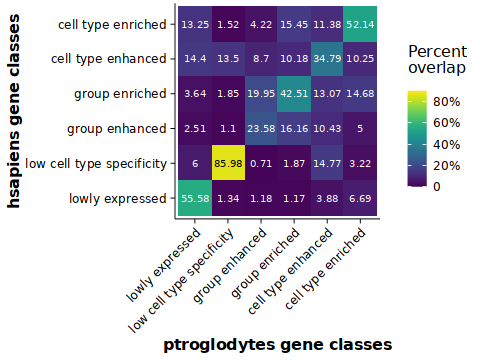

In [13]:
data %>% pivot_longer(cols = -c(1), names_to = paste0('spec_category_',species_1), values_to = 'pct')  %>% 
    rename(spec_category_species_1 = eval(paste0('spec_category_',species_1))) %>% 
    rename(spec_category_species_2 = eval(paste0('spec_category_',species_2))) %>% 
    mutate(spec_category_species_1 = factor(spec_category_species_1, levels = order)) %>% 
    mutate(spec_category_species_2 = factor(spec_category_species_2, levels = order)) %>% 
    ggplot(aes(x = spec_category_species_1, 
               y = spec_category_species_2,
               fill = pct)) +
    geom_tile() + 
    geom_text(aes(label = pct, color = ifelse(pct > 70, 'black', 'white')), size = 2, show.legend = FALSE) +
    scale_fill_viridis(limits = c(0, 90), breaks = c(0, 20, 40, 60, 80), 
                       labels = c(0, '20%', '40%', '60%', '80%'), name = 'Percent\noverlap') +
    common_45x  +
    scale_colour_manual(values=c("white"="white", "black"="black")) +
    labs(x = paste0(species_1, ' gene classes'), y = paste0(species_2, ' gene classes'))

In [15]:
data_all = data.frame()

all_pairs <- data.frame(
  species_1 = c('cjacchus', 'cjacchus', 'cjacchus', 'cjacchus', 'mmulatta', 'mmulatta', 'mmulatta', 'ggorilla', 'ggorilla', 'ptroglodytes', 'ptroglodytes'),
  species_2 = c('mmulatta', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ggorilla', 'ptroglodytes', 'hsapiens', 'ptroglodytes', 'hsapiens', 'hsapiens', 'hsapiens')
)

# Iterate over rows and assign values to species_1 and species_2
for (i in 1:nrow(all_pairs)) {
    species_1 <- all_pairs[i, 'species_1']
    species_2 <- all_pairs[i, 'species_2']

    message(species_1)
    message(species_2)

    data <- read_csv(paste0("o2o_heatmap_data_", species_1, "_", species_2, "_1TPM.csv"))
    fig = data %>% pivot_longer(cols = -c(1), names_to = paste0('spec_category_',species_1), values_to = 'pct')  %>% 
    rename(spec_category_species_1 = eval(paste0('spec_category_',species_1))) %>% 
    rename(spec_category_species_2 = eval(paste0('spec_category_',species_2))) %>% 
    mutate(spec_category_species_1 = factor(spec_category_species_1, levels = order)) %>% 
    mutate(spec_category_species_2 = factor(spec_category_species_2, levels = order)) %>% 
    ggplot(aes(x = spec_category_species_1, 
               y = spec_category_species_2,
               fill = pct)) +
    geom_tile() + 
    geom_text(aes(label = pct, color = ifelse(pct > 70, 'black', 'white')), size = 3, show.legend = FALSE) +
    scale_fill_viridis(limits = c(0, 90), breaks = c(0, 20, 40, 60, 80), 
                       labels = c(0, '20%', '40%', '60%', '80%'), name = 'Percent\noverlap') +
    common_45x  +
    scale_colour_manual(values=c("white"="white", "black"="black")) +
    labs(x = paste0(species_1, ' gene classes'), y = paste0(species_2, ' gene classes'))

    saveRDS(object = fig, file =  paste0("o2o_heatmap_figs/", species_1, "_", species_2, "_one2one_heatmap_1TPM_r.rds"))

    ggsave(plot = fig, filename = paste0("o2o_heatmap_figs/", species_1, "_", species_2, "_one2one_heatmap_1TPM_r.pdf"), height = 3, width = 4)

    data_add = data %>% pivot_longer(cols = -c(1), names_to = paste0('spec_category_',species_1), values_to = 'pct') %>% 
mutate(species_1 = species_1) %>% mutate(species_2 = species_2) 

    colnames(data_add) = c('spec_category_species_2', 'spec_category_species_1', 'pct', 'species_1', 'species_2')

    data_all = rbind(data_all, data_add)
    

    
}

cjacchus

mmulatta

Rows: 6 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): spec_category_mmulatta
dbl (6): cell type enhanced, cell type enriched, group enhanced, group enric...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
cjacchus

ggorilla

Rows: 6 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): spec_category_ggorilla
dbl (6): cell type enhanced, cell type enriched, group enhanced, group enric...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
cjacchus

ptroglodytes

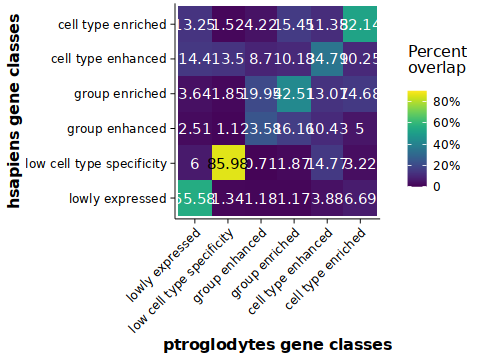

In [16]:
fig

In [17]:
options(repr.plot.width = 7, repr.plot.height = 6)


In [18]:
levels(factor(data_all$spec_category_species_1))

[1] "cell type enhanced"        "cell type enriched"       
[3] "group enhanced"            "group enriched"           
[5] "low cell type specificity" "lowly expressed"

In [19]:
data_all

spec_category_species_2,spec_category_species_1,pct,species_1,species_2
<chr>,<chr>,<dbl>,<chr>,<chr>
cell type enhanced,cell type enhanced,26.76,cjacchus,mmulatta
cell type enhanced,cell type enriched,13.57,cjacchus,mmulatta
cell type enhanced,group enhanced,8.25,cjacchus,mmulatta
cell type enhanced,group enriched,13.34,cjacchus,mmulatta
cell type enhanced,low cell type specificity,16.02,cjacchus,mmulatta
cell type enhanced,lowly expressed,10.66,cjacchus,mmulatta
cell type enriched,cell type enhanced,14.40,cjacchus,mmulatta
cell type enriched,cell type enriched,41.94,cjacchus,mmulatta
cell type enriched,group enhanced,4.80,cjacchus,mmulatta


In [20]:
fig_all = data_all %>% group_by(spec_category_species_2, spec_category_species_1) %>% mutate(avg_pct_cross_species = mean(pct)) %>% 
select(spec_category_species_2, spec_category_species_1, avg_pct_cross_species) %>% unique() %>% 
    ggplot(aes(x = factor(spec_category_species_1, levels = order), y = factor(spec_category_species_2, levels = order), fill = avg_pct_cross_species)) +
    geom_tile() + 
    geom_text(aes(label = round(avg_pct_cross_species, 2), color = ifelse(avg_pct_cross_species > 70, 'black', 'white')), size = 2, show.legend = FALSE) +
    scale_fill_viridis(limits = c(0, 90), breaks = c(0, 20, 40, 60, 80), 
                       labels = c(0, '20%', '40%', '60%', '80%'), name = 'Percent\noverlap') +
    common_45x  +
    scale_colour_manual(values=c("white"="white", "black"="black")) +
    labs(x = 'Species A gene class', y = 'Species B gene class') 

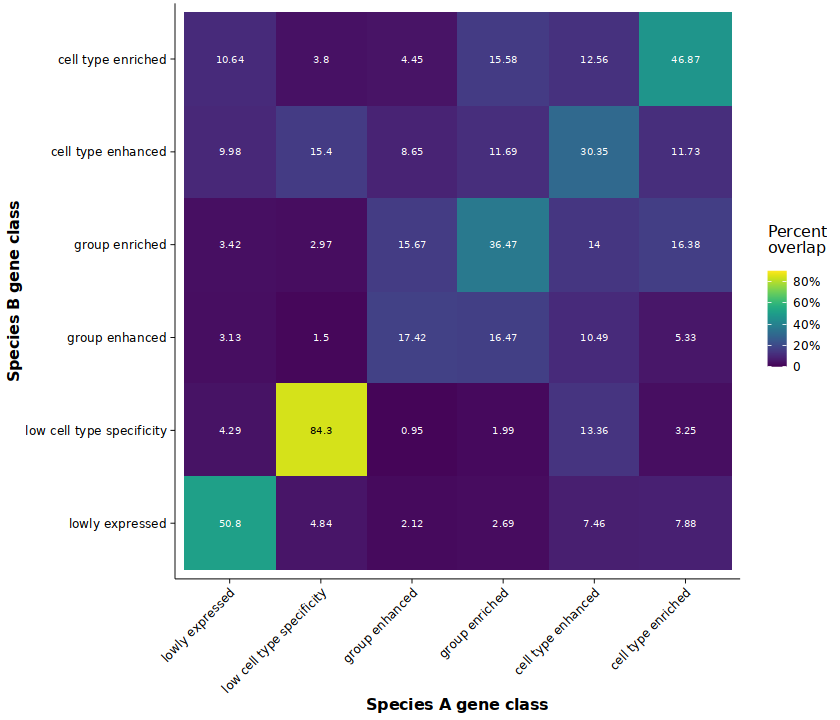

In [21]:
fig_all

In [22]:
saveRDS(object = fig_all, file =  paste0("o2o_heatmap_figs/", "avg_species_a_b_one2one_heatmap_1TPM_r.rds"))

ggsave(plot = fig_all, filename = paste0("o2o_heatmap_figs/", "avg_species_a_b_one2one_heatmap_1TPM_r.pdf"), height = 3, width = 4)


Warning message:
“‘mode(bg)’ differs between new and previous
	 ==> NOT changing ‘bg’”
